In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('data.csv')
import random as rd
import csv
import copy
from collections import Counter

import matplotlib.pyplot as plt
from copy import deepcopy
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering


In [3]:
# data,testdata= np.split(df,[int(0.80*len(df))])
X = df[df.columns[0:-1]]
Y = df[df.columns[-1]]

In [4]:
means = np.mean(X, axis = 0)
stdDev = np.std(X, axis = 0)
X = (X - means) / stdDev

In [5]:
def sigmoid(x):
    return 1.0/(1.0+ np.exp(-x))

def sigmoidderivative(x):
    return sigmoid(x) * (1.0 - sigmoid(x))

In [14]:
class NeuralNetwork:
    def __init__(self, X, Y, hiddeninfo):
        self.n = len(hiddeninfo)
        self.inputlayersize  = X.shape[1]
        self.outputlayersize = X.shape[1]
        self.allweights = [1] *(self.n + 1)
        self.allactivations = [1] *(self.n+1 )
        self.allz = [1]*(self.n +1)
        
        self.allweights[0] =  np.random.rand(self.inputlayersize,hiddeninfo[0])
        
        for i in range (1,self.n+1):
            if i==self.n:
                weights= np.random.rand(hiddeninfo[self.n-1],self.outputlayersize)
            else:
                weights = np.random.rand(hiddeninfo[i-1],hiddeninfo[i])
            self.allweights[i]=weights 
    def getreduceddimensions(self):
        return self.allactivations[0]
    
    def forwardprop(self,X):       
        output = []
        self.allz[0] = np.dot(X,self.allweights[0])
        self.allactivations[0] = sigmoid(self.allz[0])
        
        for i in range(1, len(self.allweights)):
            self.allz[i] = np.dot(self.allactivations[i-1],self.allweights[i])
            self.allactivations[i] = sigmoid(self.allz[i])

        return self.allactivations[-1]

    def backprop(self,X,Y):

        deltas = [np.float128(1.0)] * len(self.allweights)
        dweights = [np.float128(1.0)] *len(self.allweights)
        
        deltas[-1] = - (Y - X) * sigmoidderivative(self.allactivations[-1]);
        dweights[-1] = np.dot(self.allactivations[-2].T, deltas[-1])
        
#         print(self.allweights[0][0])
        i = len(self.allweights)-2
        while i>0:
            deltas[i] = np.dot(deltas[i+1],self.allweights[i+1].T)*sigmoidderivative(self.allactivations[i])
            dweights[i] = np.dot(self.allactivations[i-1].T, deltas[i])
            i-=1
        
        deltas[0] =  np.dot(deltas[1],self.allweights[1].T)*sigmoidderivative(self.allactivations[0])
        dweights[0] = np.dot(X.T, deltas[0])
        
#         print(deltas)
#         print("****************")
#         for x in deltas:
#             print(x.shape)
            
#         for x in dweights:
#             print(x.shape)
        
        for i in range(len(self.allweights)):
            self.allweights[i] = self.allweights[i] - .0001 * dweights[i]
        
#         print (self.op)
#         print(dweights)
    


In [15]:
def error(y, op):
#     print("Actual: ", y)
#     print("Derived: ", op)
    return np.mean(np.mean((y-op)**2))

In [16]:
nn = NeuralNetwork(X,Y,[14])
ferrors=[]
errors=[]
for i in range(10):
    s = 0
    for i in range(12499):
        op = nn.forwardprop(X.iloc[s:s+2])
        outY= X.iloc[s:s+2]
#         print(error(outY,op))
        errors.append(error(outY,op))
        nn.backprop(op,outY)
        s+=2
    
    opall = nn.forwardprop(X)
    finalerror = error(X, opall)
    ferrors.append(finalerror)
    print(finalerror)

1.69327645659636
1.1815375572645532
1.013974756380343
0.9887690030740053
0.9829174981503241
0.9816635527618287
0.9823494085449269
0.9844275733972083
0.988090393518346
0.9934950537766367


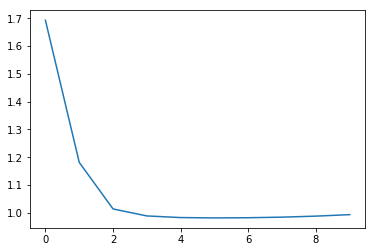

In [17]:
plt.plot(ferrors)
plt.show()

# K-Means

In [18]:
data = nn.getreduceddimensions()
reduceddf = pd.DataFrame(data=data[0:,0:])

In [19]:
inputdata = reduceddf
mean=np.mean(inputdata)
standarddev=np.std(inputdata)
for i in range(len(inputdata.columns)):
    inputdata[inputdata.columns[i]]= [(1.0 * (colum-mean[i]))/standarddev[i] for colum in inputdata[inputdata.columns[i]]]
    

In [20]:
inputdata = np.array(inputdata)
numoftrainingeg = inputdata.shape[0] 
numoffeatures =inputdata.shape[1] #number of features. Here n=2
k=5
random=rd.randint(0,numoftrainingeg-1)
centers= np.array(inputdata[random])

for i in range(4):
    random=rd.randint(0,numoftrainingeg-1)
    centers = np.vstack((centers,inputdata[random]))

In [21]:
error = 99999
distances = np.zeros((numoftrainingeg,k))

while error >= 0.001:
    for i in range(k):
        distances[:,i] = np.linalg.norm(inputdata - centers[i], axis=1)
    
    clusters = np.argmin(distances, axis = 1)
    
    centersold = deepcopy(centers)

    for i in range(k):
        centers[i] = np.mean(inputdata[clusters == i], axis=0)
    
    error = np.linalg.norm(centers - centersold)
    print(error)

4.875641396216456
0.7444448123640358
0.48241850596547936
0.45234233410667307
0.4802906608364671
0.39053021202851496
0.34408119778026786
0.260350108954048
0.18825493453809236
0.1298874272344948
0.10229441472974019
0.09739045704509085
0.08711495070197275
0.10197229005543076
0.15922022591471507
0.4096319705075587
0.7342161077762942
0.6021140522253969
0.6042159384980857
0.4105160628820981
0.27528103901947765
0.1608933419057909
0.08763492955981418
0.07442828517494755
0.052228205283685096
0.04220591545544358
0.02373400563099195
0.010182857962263508
0.002268711505788467
0.0


In [22]:
def pre_dict(clusters, inputdata):
    predicted={}
    for i in range(len(clusters)):
        cl = clusters[i]
        if cl in predicted:
            predicted[cl].append(inputdata[i])
        else:
            predicted[cl]=[]
            predicted[cl].append(inputdata[i])
    
    purity=[]
    for cl in predicted:
        keys=[]
    
        for onelist in predicted[cl]:
            keys.append(onelist[14])
    
        c = Counter(keys)
        print(len(keys))
        value, count = c.most_common() [0]
        purity.append((value, (count/len(keys))))
    return purity

In [23]:
reduceddf = pd.DataFrame(inputdata)
reduceddf[29] = np.array(df[df.columns[-1]])

inputdata = np.array(reduceddf)
purity = pre_dict(clusters,inputdata)

9701
10287
2703
1216
1091


In [24]:
averagekmeans=0
for i in range(len(purity)):
    print(purity[i][0], purity[i][1])
    averagekmeans+=purity[i][1]
averagekmeans/=len(purity)

normal 0.9777342542005979
dos 0.8210362593564693
normal 0.7669256381798002
probe 0.5394736842105263
normal 0.7305224564619615


# GMM

In [25]:
data = nn.getreduceddimensions()
reduceddf = pd.DataFrame(data=data[0:,0:])

In [26]:
inputdata = np.array(reduceddf)

GMM = GaussianMixture(n_components=5).fit(inputdata)
print('Successful!',GMM.converged_)

df_1 = pd.DataFrame(inputdata)
predictionvalues = GMM.predict(inputdata)

df_1[29] = np.array(df[df.columns[-1]])

inputdata = np.array(df_1)
purity = pre_dict(predictionvalues, inputdata)

Successful! True
9116
8735
1361
2872
2914


In [27]:
averagegmm=0
for i in range(len(purity)):
    print(purity[i][0], purity[i][1])
    averagegmm+=purity[i][1]
averagegmm/=len(purity)

normal 0.985410267661255
dos 0.9028048082427018
normal 0.5025716385011021
normal 0.6316155988857939
normal 0.6382978723404256


# Hierarchical Clustering

In [28]:
data = nn.getreduceddimensions()
reduceddf = pd.DataFrame(data=data[0:,0:])

In [29]:
inputdata = np.array(reduceddf)
hierClusters = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto', connectivity=None, linkage='single', memory=None, n_clusters=5, pooling_func='deprecated') 
hierClusters.fit(inputdata)
hierClusters.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
df_1 = pd.DataFrame(inputdata)
df_1[29] = np.array(df[df.columns[-1]])
inputdata = np.array(df_1)
averageh=0
purity = pre_dict(hierClusters.labels_, inputdata)
for i in range(len(purity)):
    print(purity[i][0], purity[i][1])
    averageh+=purity[i][1]
averageh/=len(purity)

24993
2
1
1
1
normal 0.5345096627055576
normal 1.0
normal 1.0
normal 1.0
normal 1.0


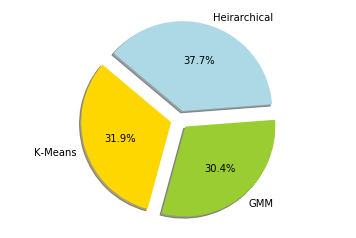

In [31]:
labels = 'K-Means', 'GMM', 'Heirarchical'
sizes = [averagekmeans, averagegmm,averageh]
colors = ['gold', 'yellowgreen', 'lightblue']
explode = (0.1, 0.1,0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()